# Notebook for Preliminary Data Analysis

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/vehicles.csv")
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## Data Description and exploration

### What data features need to be cleaned

In [3]:
print("Number of NaN's across features")
nans_df = pd.DataFrame(df.isna().sum(axis=0)).T
nans_df.loc[1] = nans_df.loc[0] / df.shape[0]
nans_df

Number of NaN's across features


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,0.0,0.0,0.0,0.0,0.0,1205.000000,17646.000000,5277.000000,174104.000000,177678.000000,...,306361.000000,92858.000000,130203.000000,68.000000,70.000000,426880.0,0.0,6549.000000,6549.000000,68.000000
1,0.0,0.0,0.0,0.0,0.0,0.002823,0.041337,0.012362,0.407852,0.416225,...,0.717675,0.217527,0.305011,0.000159,0.000164,1.0,0.0,0.015342,0.015342,0.000159


In [4]:
# A lot of data in the description are repetitive
list(df.description[~df.description.isna()])[:20]

["Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000909557📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7171237-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minu

### The description of the data

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


### The quantity of the data

In [6]:
print("Data have {} rows and {} columns".format(*df.shape))

Data have 426880 rows and 26 columns


### The data types of the features according to the [source](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)

* **id** - int
* **url** - string
* **region** - string (categorical)
* **region_url** - string (categorical)
* **price** - int
* **year** - string (date)
* **manufacturer** - string (categorical)
* **model** - string
* **condition** - string (categorical)
* **cylinders** - string (categorical)
* **fuel** - string (categorical)
* **odometer** - int
* **title_status** - (categorical)
* **transmission** - (categorical)
* **VIN** - string
* **drive** - string (categorical)
* **size** - string (categorical)
* **type** - string (categorical)
* **paint_color** - string (categorical)
* **image_url** - string
* **description** - string
* **county** - all nan's
* **state** - string (categorical)
* **lat** - float
* **lon** - float
* **posting_date** - string (date)

### Unique values for every feature

In [7]:
df.apply(pd.Series.nunique)

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64

### Categories of feature types
Described above on the data types

### The distribution of each data feature and the target

In [33]:
def pairplot(df, y_vars, x_vars, rot=90, height=2.5):
    plot = sns.pairplot(data=df,
                y_vars=y_vars, x_vars=x_vars, height=height)
    plot.set(yscale="log")
    for ax in plot.axes.flatten():
        ax.tick_params(rotation=rot)
    plt.show()

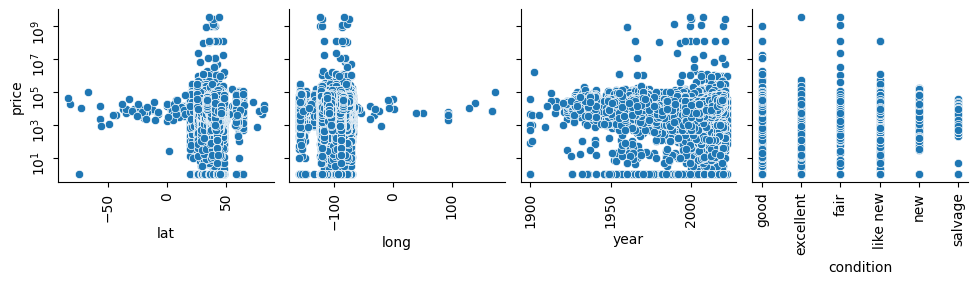

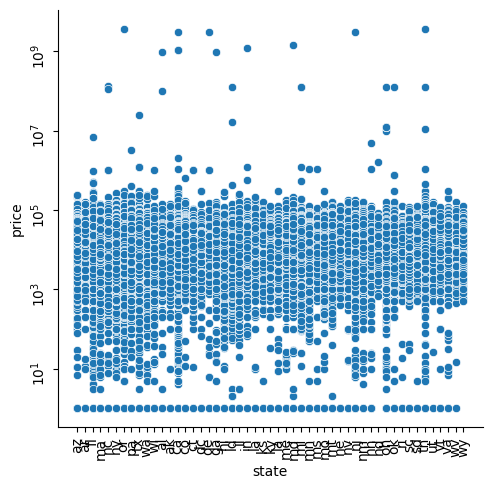

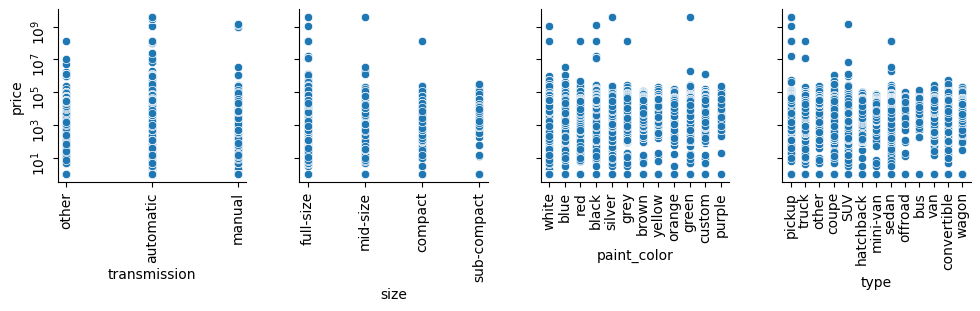

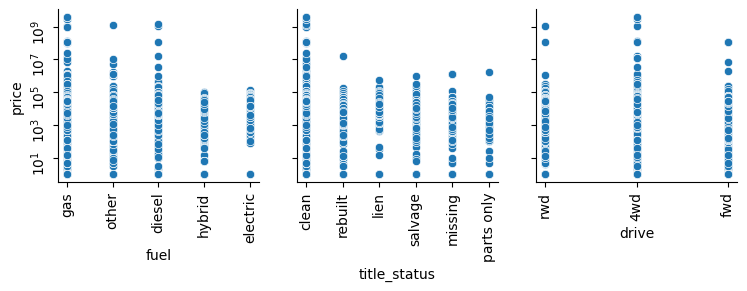

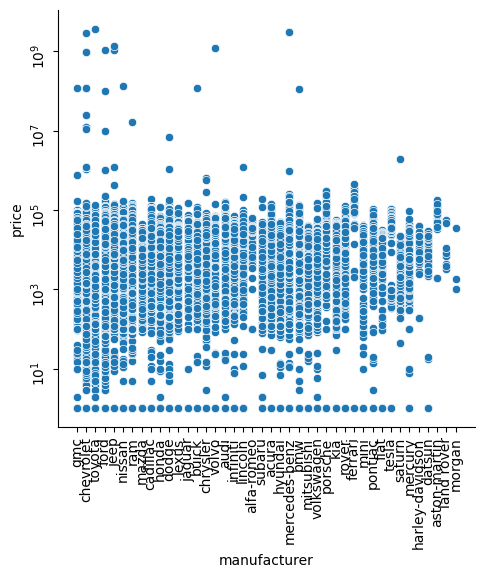

In [34]:
pairplot(df, ['price'], ['lat', 'long', 'year', 'condition'])
pairplot(df, ['price'], ['state'], height=5)
pairplot(df, ['price'], ['transmission', 'size', 'paint_color', 'type'])
pairplot(df, ['price'], ['fuel', 'title_status', 'drive'])
pairplot(df, ['price'], ['manufacturer'], height=5)